In [1]:
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler




data=pd.read_csv("/Users/Tara/Downloads/Global_Mobility_Report (1).csv")


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
data.head

<bound method NDFrame.head of         country_region_code        country_region       sub_region_1  \
0                        AE  United Arab Emirates                NaN   
1                        AE  United Arab Emirates                NaN   
2                        AE  United Arab Emirates                NaN   
3                        AE  United Arab Emirates                NaN   
4                        AE  United Arab Emirates                NaN   
...                     ...                   ...                ...   
2356279                  ZW              Zimbabwe  Midlands Province   
2356280                  ZW              Zimbabwe  Midlands Province   
2356281                  ZW              Zimbabwe  Midlands Province   
2356282                  ZW              Zimbabwe  Midlands Province   
2356283                  ZW              Zimbabwe  Midlands Province   

        sub_region_2 metro_area iso_3166_2_code  census_fips_code        date  \
0                NaN    

In [3]:
data=data[data.country_region=="United States"]

In [4]:
data.head

<bound method NDFrame.head of         country_region_code country_region sub_region_1   sub_region_2  \
1794395                  US  United States          NaN            NaN   
1794396                  US  United States          NaN            NaN   
1794397                  US  United States          NaN            NaN   
1794398                  US  United States          NaN            NaN   
1794399                  US  United States          NaN            NaN   
...                     ...            ...          ...            ...   
2332432                  US  United States      Wyoming  Weston County   
2332433                  US  United States      Wyoming  Weston County   
2332434                  US  United States      Wyoming  Weston County   
2332435                  US  United States      Wyoming  Weston County   
2332436                  US  United States      Wyoming  Weston County   

        metro_area iso_3166_2_code  census_fips_code        date  \
1794395      

In [5]:
data=data[data.date.astype(str).str.contains("2020-08")]
data

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
1794563,US,United States,NaN,NaN,NaN,NaN,NaN,2020-08-01,-17.0,0.0,69.0,-20.0,-14.0,4.0
1794564,US,United States,NaN,NaN,NaN,NaN,NaN,2020-08-02,-16.0,-4.0,52.0,-24.0,-17.0,3.0
1794565,US,United States,NaN,NaN,NaN,NaN,NaN,2020-08-03,-12.0,-1.0,47.0,-31.0,-38.0,10.0
1794566,US,United States,NaN,NaN,NaN,NaN,NaN,2020-08-04,-13.0,-3.0,48.0,-33.0,-39.0,11.0
1794567,US,United States,NaN,NaN,NaN,NaN,NaN,2020-08-05,-11.0,-2.0,61.0,-30.0,-37.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2332428,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2020-08-25,NaN,NaN,NaN,NaN,-23.0,NaN
2332429,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2020-08-26,NaN,NaN,NaN,NaN,-22.0,NaN
2332430,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2020-08-27,NaN,NaN,NaN,NaN,-16.0,NaN
2332431,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2020-08-28,NaN,NaN,NaN,NaN,-20.0,NaN


In [6]:
data=data[["country_region", "sub_region_1", "date", 'retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline', "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]]

In [7]:
data.head

<bound method NDFrame.head of         country_region sub_region_1        date  \
1794563  United States          NaN  2020-08-01   
1794564  United States          NaN  2020-08-02   
1794565  United States          NaN  2020-08-03   
1794566  United States          NaN  2020-08-04   
1794567  United States          NaN  2020-08-05   
...                ...          ...         ...   
2332428  United States      Wyoming  2020-08-25   
2332429  United States      Wyoming  2020-08-26   
2332430  United States      Wyoming  2020-08-27   
2332431  United States      Wyoming  2020-08-28   
2332432  United States      Wyoming  2020-08-31   

         retail_and_recreation_percent_change_from_baseline  \
1794563                                              -17.0    
1794564                                              -16.0    
1794565                                              -12.0    
1794566                                              -13.0    
1794567                                   

In [8]:
data.dropna(axis=0, how="any", inplace=True)

<ipython-input-8-a41fd17ba840>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(axis=0, how="any", inplace=True)


In [9]:
data.head


<bound method NDFrame.head of         country_region sub_region_1        date  \
1794766  United States      Alabama  2020-08-01   
1794767  United States      Alabama  2020-08-02   
1794768  United States      Alabama  2020-08-03   
1794769  United States      Alabama  2020-08-04   
1794770  United States      Alabama  2020-08-05   
...                ...          ...         ...   
2330798  United States      Wyoming  2020-08-27   
2330799  United States      Wyoming  2020-08-28   
2330800  United States      Wyoming  2020-08-29   
2330801  United States      Wyoming  2020-08-30   
2330802  United States      Wyoming  2020-08-31   

         retail_and_recreation_percent_change_from_baseline  \
1794766                                               -9.0    
1794767                                              -10.0    
1794768                                               -1.0    
1794769                                               -4.0    
1794770                                   

In [10]:
scaler=StandardScaler()
data[["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]]=scaler.fit_transform(data[["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]]) 

data




<ipython-input-10-a17db85ee869>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]]=scaler.fit_transform(data[["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]])
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to

,country_region,sub_region_1,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
1794766,United States,Alabama,2020-08-01,-0.051038,0.654844,0.917139,1.672286,-1.048847
1794767,United States,Alabama,2020-08-02,-0.127068,0.221843,0.646514,0.886608,-0.820413
1794768,United States,Alabama,2020-08-03,0.557203,0.481644,0.375889,-0.160961,0.093327
1794769,United States,Alabama,2020-08-04,0.329113,0.395044,0.259907,-0.073664,0.093327
1794770,United States,Alabama,2020-08-05,0.481173,0.308443,0.337228,-0.160961,0.093327
...,...,...,...,...,...,...,...,...
2330798,United States,Wyoming,2020-08-27,1.013384,1.261045,0.414550,0.013634,-0.591978
2330799,United States,Wyoming,2020-08-28,0.557203,0.914644,0.259907,0.188229,-0.591978
2330800,United States,Wyoming,2020-08-29,0.177053,0.828044,0.259907,1.235798,-1.962587
2330801,United States,Wyoming,2020-08-30,0.709264,1.174445,0.298568,1.759583,-1.734152


In [11]:
from sklearn.decomposition import PCA
pca=PCA(n_components=4)
principal_components = pca.fit_transform(data[["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]])
pca_data = pd.DataFrame(data = principal_components, columns = ['PC 1', 'PC 2', "PC 3", "PC 4"])
print(pca.explained_variance_ratio_)
print("0.98260139 of the variance in the data is represented by these 4 principle components")
pca_data



[0.60549899 0.22371567 0.08850242 0.04995119]
0.98260139 of the variance in the data is represented by these 4 principle components


,PC 1,PC 2,PC 3,PC 4
0,1.877683,1.091718,0.115686,0.515388
1,1.090630,0.782335,0.241074,0.286793
2,0.526554,-0.662364,0.040785,-0.022607
3,0.369137,-0.449935,0.005156,0.065497
4,0.397551,-0.547485,0.101500,-0.083045
...,...,...,...,...
23456,1.484729,-0.776662,-0.468275,0.090330
23457,1.128390,-0.290491,-0.391820,0.173404
23458,1.991308,1.202472,-0.601418,0.283088
23459,2.516319,0.995703,-0.860531,0.105479


In [12]:
# factor loadings are correlations of features and components- trying to find the latent factors

loadings = pd.DataFrame( pca.components_, columns=["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]).T
loadings


,0,1,2,3
retail_and_recreation_percent_change_from_baseline,0.447255,-0.468299,-0.149394,-0.745370
grocery_and_pharmacy_percent_change_from_baseline,0.445536,-0.423136,-0.474260,0.630006
transit_stations_percent_change_from_baseline,0.461226,-0.154863,0.848033,0.206718
workplaces_percent_change_from_baseline,0.420114,0.584317,-0.142256,-0.038651
residential_percent_change_from_baseline,-0.460690,-0.486049,0.115597,0.057362


In [1]:
print("'loadings' are also eigenvectors")
print("Greatest contributors to PC1: retail, grocery, transit, workplaces")
print("Greatest contributors to PC2: workplaces")

print("Greatest contributor to PC3: transit")
print("Greatest contributors to PC4: grocery")

# https://scentellegher.github.io/machine-learning/2020/01/27/pca-loadings-sklearn.html
# could also do color matrix https://towardsdatascience.com/understand-your-data-with-principle-component-analysis-pca-and-discover-underlying-patterns-d6cadb020939

'loadings' are also eigenvectors
Greatest contributors to PC1: retail, grocery, transit, workplaces
Greatest contributors to PC2: workplaces
Greatest contributor to PC3: transit
Greatest contributors to PC4: grocery


In [14]:
# # find OPTIMAL value for kmeans
# from sklearn.cluster import KMeans
# data_kmeans = pd.DataFrame(pca_data)
# Sum_of_squared_distances = []
# K = range(1,7)
# for k in K:
#     km = KMeans(n_clusters=k)
#     km = km.fit(pca_data)
#     Sum_of_squared_distances.append(km.inertia_)
# plt.plot(K, Sum_of_squared_distances, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Sum_of_squared_distances')
# plt.title('Elbow Method For Optimal k')
# plt.show()






In [15]:
print(type(data[["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]]))

<class 'pandas.core.frame.DataFrame'>


In [16]:
# run KMeans
kmeans = KMeans(n_clusters=4)
y = kmeans.fit_predict(pca_data[['PC 1', 'PC 2', "PC 3", "PC 4"]])
pca_data['Cluster'] = y
# pca_data["State"]=data["sub_region_1"]
pca_data

,PC 1,PC 2,PC 3,PC 4,Cluster
0,1.877683,1.091718,0.115686,0.515388,2
1,1.090630,0.782335,0.241074,0.286793,0
2,0.526554,-0.662364,0.040785,-0.022607,1
3,0.369137,-0.449935,0.005156,0.065497,1
4,0.397551,-0.547485,0.101500,-0.083045,1
...,...,...,...,...,...
23456,1.484729,-0.776662,-0.468275,0.090330,2
23457,1.128390,-0.290491,-0.391820,0.173404,2
23458,1.991308,1.202472,-0.601418,0.283088,0
23459,2.516319,0.995703,-0.860531,0.105479,2


In [17]:
ls_to_append=[]
for index, row in data.iterrows():
    ls_to_append.append(row["sub_region_1"])

# ls_to_append


In [18]:
series_to_add_to_pca_data=pd.Series(ls_to_append)
pca_data["State"]=series_to_add_to_pca_data
pca_data


,PC 1,PC 2,PC 3,PC 4,Cluster,State
0,1.877683,1.091718,0.115686,0.515388,2,Alabama
1,1.090630,0.782335,0.241074,0.286793,0,Alabama
2,0.526554,-0.662364,0.040785,-0.022607,1,Alabama
3,0.369137,-0.449935,0.005156,0.065497,1,Alabama
4,0.397551,-0.547485,0.101500,-0.083045,1,Alabama
...,...,...,...,...,...,...
23456,1.484729,-0.776662,-0.468275,0.090330,2,Wyoming
23457,1.128390,-0.290491,-0.391820,0.173404,2,Wyoming
23458,1.991308,1.202472,-0.601418,0.283088,0,Wyoming
23459,2.516319,0.995703,-0.860531,0.105479,2,Wyoming


In [19]:
pca_data.Cluster.unique()

array([2, 0, 1, 3], dtype=int32)

In [20]:
c0={}
c1={}
c2={}
c3={}
c4={}
list_of_clusters=[c0,c1,c2,c3,c4]
for index, row in pca_data.iterrows():
    for i in range(0,5):
        if row["Cluster"]==i:
            if row["State"] in list_of_clusters[i]:
                list_of_clusters[i][row["State"]]+=1
            else:
                list_of_clusters[i][row["State"]]=1
                
                
print(list_of_clusters)

[{'Alabama': 129, 'Alaska': 7, 'Arizona': 69, 'Arkansas': 55, 'California': 303, 'Colorado': 102, 'Connecticut': 49, 'Delaware': 20, 'District of Columbia': 1, 'Florida': 263, 'Georgia': 210, 'Idaho': 19, 'Illinois': 148, 'Indiana': 76, 'Iowa': 29, 'Kansas': 70, 'Kentucky': 66, 'Louisiana': 120, 'Maine': 13, 'Maryland': 103, 'Massachusetts': 94, 'Michigan': 101, 'Minnesota': 66, 'Mississippi': 64, 'Missouri': 101, 'Montana': 8, 'Nebraska': 36, 'Nevada': 35, 'New Hampshire': 20, 'New Jersey': 139, 'New Mexico': 71, 'New York': 204, 'North Carolina': 203, 'North Dakota': 35, 'Ohio': 153, 'Oklahoma': 58, 'Oregon': 89, 'Pennsylvania': 175, 'Rhode Island': 29, 'South Carolina': 127, 'Tennessee': 135, 'Texas': 377, 'Utah': 35, 'Vermont': 20, 'Virginia': 194, 'Washington': 115, 'West Virginia': 25, 'Wisconsin': 73, 'Wyoming': 1}, {'Alabama': 251, 'Alaska': 39, 'Arizona': 81, 'Arkansas': 205, 'California': 307, 'Colorado': 132, 'Connecticut': 112, 'Delaware': 37, 'Florida': 194, 'Georgia': 366

In [21]:
states_clusters={}
for index, row in pca_data.iterrows():
    if row["State"] not in states_clusters:
        state_dict={}
        for i in range(0,5):
            if row["State"] in list_of_clusters[i]:
                state_dict[i]=list_of_clusters[i][row["State"]]
        print(state_dict)
        state_dict_vals=list(state_dict.values())
        state_dict_keys=list(state_dict.keys())
        state_vals_max=max(state_dict_vals)
        max_ind=state_dict_vals.index(state_vals_max)
        max_cluster=state_dict_keys[max_ind]
        states_clusters[row["State"]]=max_cluster
print(states_clusters)
    

{0: 129, 1: 251, 2: 90, 3: 18}
{0: 7, 1: 39, 2: 47}
{0: 69, 1: 81, 2: 65, 3: 137}
{0: 55, 1: 205, 2: 82, 3: 12}
{0: 303, 1: 307, 2: 44, 3: 581}
{0: 102, 1: 132, 2: 73, 3: 116}
{0: 49, 1: 112, 2: 23, 3: 27}
{0: 20, 1: 37, 2: 32, 3: 21}
{0: 1, 3: 30}
{0: 263, 1: 194, 2: 58, 3: 649}
{0: 210, 1: 366, 2: 80, 3: 171}
{3: 145}
{0: 19, 1: 42, 2: 116}
{0: 148, 1: 361, 2: 174, 3: 51}
{0: 76, 1: 309, 2: 395, 3: 20}
{0: 29, 1: 90, 2: 175, 3: 1}
{0: 70, 1: 137, 2: 58}
{0: 66, 1: 280, 2: 51, 3: 22}
{0: 120, 1: 288, 2: 60, 3: 102}
{0: 13, 1: 40, 2: 97}
{0: 103, 1: 82, 2: 10, 3: 194}
{0: 94, 1: 120, 2: 46, 3: 124}
{0: 101, 1: 225, 2: 159, 3: 85}
{0: 66, 1: 155, 2: 24, 3: 69}
{0: 64, 1: 217, 2: 25, 3: 8}
{0: 101, 1: 193, 2: 191, 3: 53}
{0: 8, 1: 10, 2: 168}
{0: 36, 1: 87, 2: 84}
{0: 35, 1: 30, 2: 42, 3: 50}
{0: 20, 1: 84, 2: 37}
{0: 139, 1: 151, 2: 54, 3: 239}
{0: 71, 1: 124, 2: 1, 3: 110}
{0: 204, 1: 350, 2: 108, 3: 280}
{0: 203, 1: 460, 2: 70, 3: 122}
{0: 35, 1: 68, 2: 45}
{0: 153, 1: 424, 2: 406, 3:

In [24]:
clusters_and_their_states={1:[], 2:[], 3:[], 4:[], 0:[]}

for i in states_clusters.keys():
    for j in range(0,5):
        if states_clusters[i]==j:
            clusters_and_their_states[j].append(i)


print(clusters_and_their_states)


{1: ['Alabama', 'Arkansas', 'Colorado', 'Connecticut', 'Delaware', 'Georgia', 'Illinois', 'Kansas', 'Kentucky', 'Louisiana', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Nebraska', 'New Hampshire', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'Tennessee', 'Texas', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin'], 2: ['Alaska', 'Idaho', 'Indiana', 'Iowa', 'Maine', 'Montana', 'Oklahoma', 'South Dakota', 'Utah', 'Wyoming'], 3: ['Arizona', 'California', 'District of Columbia', 'Florida', 'Hawaii', 'Maryland', 'Massachusetts', 'Nevada', 'New Jersey'], 4: [], 0: []}


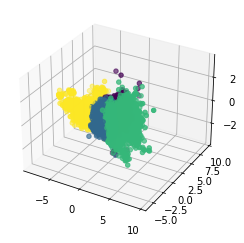

In [25]:
# 4d plot for april kmeans
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = pca_data["PC 1"]
y = pca_data["PC 2"]
z = pca_data["PC 3"]
z = pca_data["PC 4"]

categories = np.unique(pca_data["Cluster"])
colors = np.linspace(0, 1, len(categories))
colordict = dict(zip(categories, colors))  
pca_data["Color"] = pca_data["Cluster"].apply(lambda x: colordict[x])

img=ax.scatter(x,y,z, c=pca_data.Color)


# fig.colorbar(img)
plt.show()


In [26]:
num=0
pca_2=pd.DataFrame(columns=['PC 1', 'PC 2', "PC 3", "PC 4", "Cluster", "State"])
for index, row in pca_data.iterrows():
    if num%15==0:
        pca_2=pca_2.append({"PC 1": row["PC 1"],"PC 2": row["PC 2"],"PC 3": row["PC 3"],"PC 4": row["PC 4"],"Cluster": row["Cluster"],"State": row["State"] }, ignore_index=True)
    num+=1
pca_2.head


<bound method NDFrame.head of           PC 1      PC 2      PC 3      PC 4 Cluster    State
0     1.877683  1.091718  0.115686  0.515388       2  Alabama
1     0.941887  0.990855  0.297656  0.160430       0  Alabama
2     0.008290  0.166673  0.271689 -0.295972       1  Alabama
3     2.418657 -0.089314 -1.676212  0.320867       2  Alabama
4     2.042682  0.174879 -0.183188  0.525960       2  Alabama
...        ...       ...       ...       ...     ...      ...
1560  2.913716  0.924099 -0.095316 -0.063753       2  Wyoming
1561  1.494680 -0.735364  0.551628  0.184466       2  Wyoming
1562  2.102113  0.991243 -0.462009  0.446905       2  Wyoming
1563  3.382198  0.602276 -0.060958  0.675860       2  Wyoming
1564  1.687913 -0.485857 -0.365870 -0.193929       2  Wyoming

[1565 rows x 6 columns]>

In [27]:
pca_2

,PC 1,PC 2,PC 3,PC 4,Cluster,State
0,1.877683,1.091718,0.115686,0.515388,2,Alabama
1,0.941887,0.990855,0.297656,0.160430,0,Alabama
2,0.008290,0.166673,0.271689,-0.295972,1,Alabama
3,2.418657,-0.089314,-1.676212,0.320867,2,Alabama
4,2.042682,0.174879,-0.183188,0.525960,2,Alabama
...,...,...,...,...,...,...
1560,2.913716,0.924099,-0.095316,-0.063753,2,Wyoming
1561,1.494680,-0.735364,0.551628,0.184466,2,Wyoming
1562,2.102113,0.991243,-0.462009,0.446905,2,Wyoming
1563,3.382198,0.602276,-0.060958,0.675860,2,Wyoming


In [28]:
clusters_and_their_states.values()

dict_values([['Alabama', 'Arkansas', 'Colorado', 'Connecticut', 'Delaware', 'Georgia', 'Illinois', 'Kansas', 'Kentucky', 'Louisiana', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Nebraska', 'New Hampshire', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'Tennessee', 'Texas', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin'], ['Alaska', 'Idaho', 'Indiana', 'Iowa', 'Maine', 'Montana', 'Oklahoma', 'South Dakota', 'Utah', 'Wyoming'], ['Arizona', 'California', 'District of Columbia', 'Florida', 'Hawaii', 'Maryland', 'Massachusetts', 'Nevada', 'New Jersey'], [], []])

In [29]:
# vals=list(clusters_and_their_states.values())
# keys=list(clusters_and_their_states.keys())
# for index, row in pca_2.iterrows():
#     for i in range(len(vals)):
#         if row["State"] in vals[i]:
#             pca_2.at[index, "Cluster"]= keys[i]
# pca_2
            
            
    

In [30]:
# 5d plot for  kmeans




import plotly
import plotly.graph_objs as go

#Set marker properties
markercolor = pca_2["Cluster"]
markersize = (pca_2['PC 4']+6)*2

#Make Plotly figure
fig1 = go.Scatter3d(x=pca_2["PC 1"],
                    y=pca_2["PC 2"],
                    z=pca_2["PC 3"],
                    marker=dict(size=markersize,
                                color=markercolor,
                                opacity=0.9,
                                reversescale=True,colorscale='Rainbow'),
                    line=dict (width=0.02),
                    mode='markers')

#Make Plot.ly Layout
mylayout = go.Layout(scene=dict(xaxis=dict( title="Principal Component 1"),
                                yaxis=dict( title="Principal Component 2"),
                                zaxis=dict(title="Principal Component 3")),
                    )

#Plot and save html
plotly.offline.plot({"data": [fig1],
                     "layout": mylayout},
                     auto_open=True, filename=("AUGUST Mobility KMeans.html")
                   )


'AUGUST Mobility KMeans.html'